## LCC calculation tests (for both rails)

Notebook to test the LCC calculations for both rails, i.e., high and low/inner rail.

Version 0.1 (2025-05-15): initial analysis of LCC when both high and low rail are considered combined.

## Reading input data and interpolation

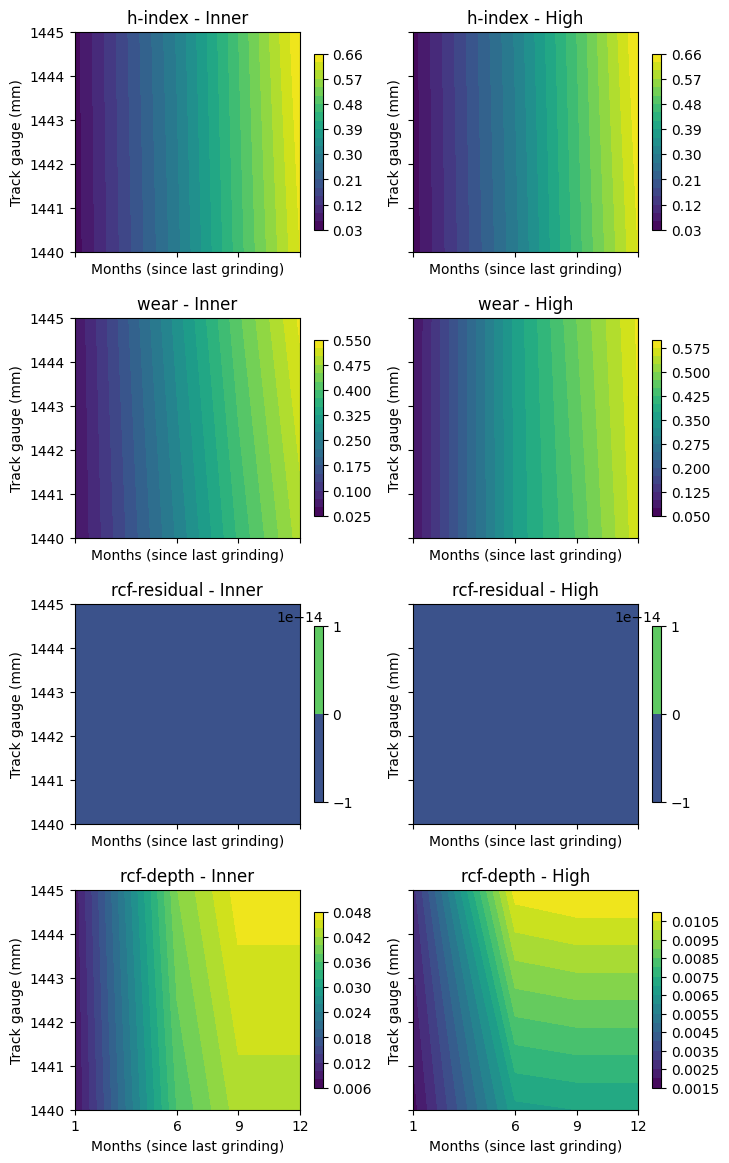

In [5]:
# Ensure the preprocessings module is accessible
import sys
sys.path.append('../')  # Adjust the path to the root directory containing 'preprocessings'

# Import the function to read the input data
from preprocessings.read_input_data import read_input_data

# Call the function to read the dataW
file_path = '../data/raw/CM2025/BDL_111_results_JL_R1465.csv'
#file_path = '../data/raw/CM2025/BDL_111_results_JL_R495.csv'
#file_path = '../data/raw/CM2025/BDL_111_results_JL_0512_2rcfs.csv'

data_df = read_input_data(file_path)

# interpolate the using interpolate_rail_data
from rail_analysis.interpolation import interpolate_rail_data
data_df_interpolated = interpolate_rail_data(data_df)

# plot the six figures using plot_six_figures
from rail_analysis.interpolation import plot_all_interpolated_tables
plot_all_interpolated_tables(data_df_interpolated)

## LCC calculation in combination 

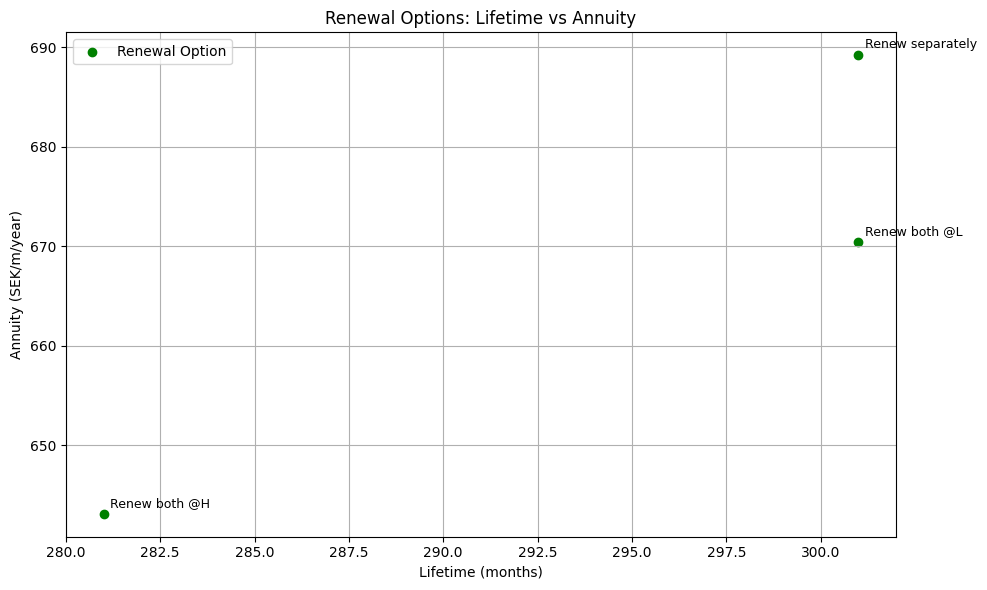

Total annuity: 643.11 SEK/m/year
Renew both rails every: 23.42 years


In [7]:
from rail_analysis.LCC_two_rails import get_annuity_track_refactored, plot_historical_data_two_rails

# Example usage of the get_lcc function
grinding_freq_low = 3  # months
grinding_freq_high = 3  # months
gauge_freq = 48  # months
annuity, rail_lifetime, history = get_annuity_track_refactored(data_df_interpolated, grinding_freq_low, grinding_freq_high, gauge_freq, track_results=True, plot_timeline=True)
print(f"Total annuity: {annuity:.2f} SEK/m/year")
print(f"Renew both rails every: {rail_lifetime:.2f} years")

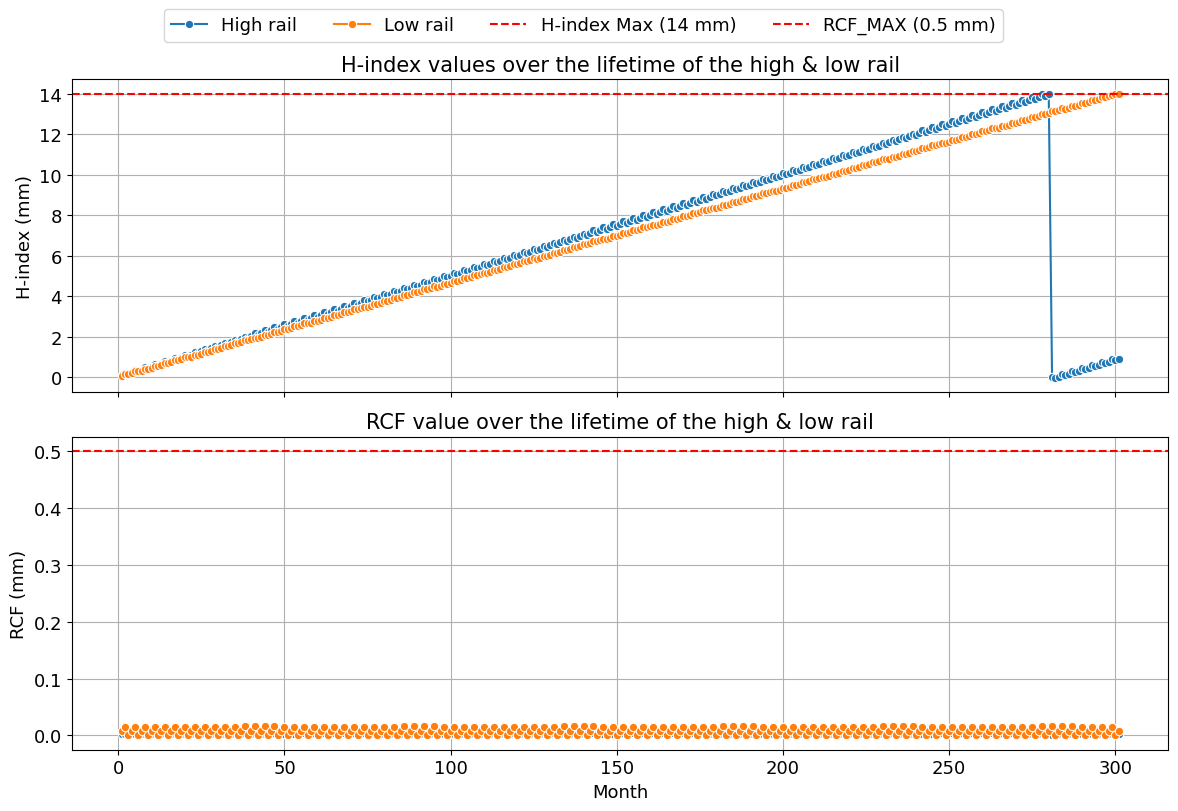

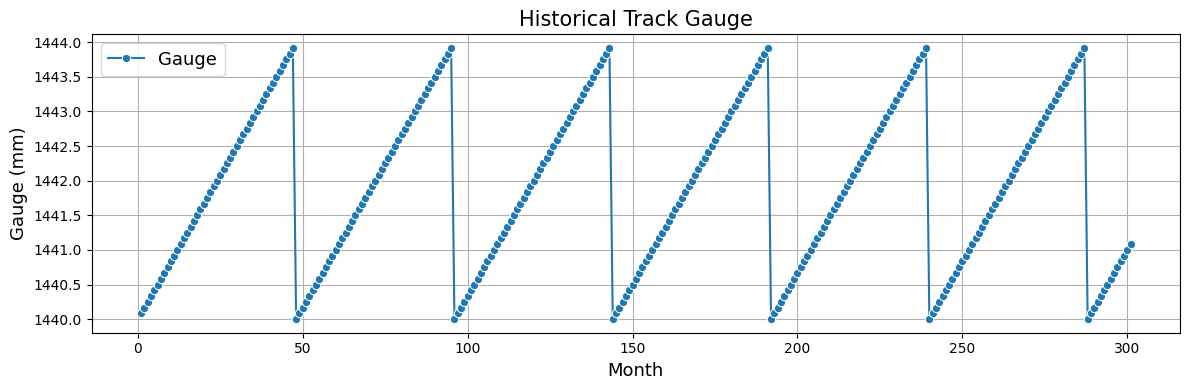

In [8]:
plot_historical_data_two_rails(history)